In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def harvest_fish(steps, h, max_harvest_rate):
    f = np.zeros(steps+1)
    t = np.zeros(steps+1)
    max_growth_rate = 0.5
    carrying_capacity = 10**6
    ramp_start_min = 2
    MSY = 0.7
    results = []
    
    t[0] = 0
    f[0] = 200000
    
    for ramp_start in np.arange(ramp_start_min, 10.01 ,0.5):
        for ramp_end in np.arange(ramp_start, 10.01, 0.5):
            total_harvest = 0
            no_fish = False
    
            for step in range(steps):
                time = h * step
                harvest_factor = 0
                if time > ramp_end:
                    harvest_factor = MSY
                elif time > ramp_start:
                    harvest_factor =  MSY/(ramp_end - ramp_start) * (time - ramp_start)
                harvest_rate = harvest_factor * max_harvest_rate
                if no_fish:
                    current_harvest = 0
                    new_f = 0
                else:
                    current_harvest = h * harvest_rate
                    new_f = f[step] + h*(max_growth_rate * (1 - f[step]/carrying_capacity) * f[step] - harvest_rate)
                    if new_f <= 0:
                        no_fish = True
                        current_harvest = f[step]
                        new_f = 0
                f[step+1] = new_f
                total_harvest = total_harvest + current_harvest
                t[step+1] = h * (step+1)
            results.append([ramp_start, ramp_end, total_harvest])
    return t, f, results

<h2>Verloop populatie vissen, wanneer de vis vangst start na 2 jaar</h2>

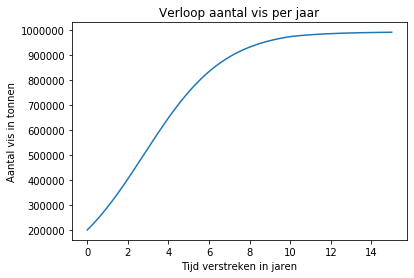

In [3]:
t, f, results = harvest_fish(1500, 0.01, 5000)
plt.plot(t, f)
plt.title("Verloop aantal vis per jaar")
plt.ylabel("Aantal vis in tonnen")
plt.xlabel("Tijd verstreken in jaren")
plt.show()

<h2>visualistie van de visopbrengst per mogelijke tijdsperiode van 2 tot 10 jaar</h2>

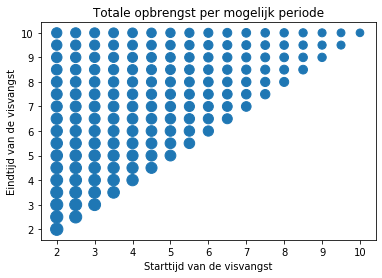

In [4]:
x = [record[0]for record in results]
y = [record[1]for record in results]
s = np.array([record[2]for record in results])
plt.scatter(x, y, s=s/300)
plt.ylabel("Eindtijd van de visvangst")
plt.xlabel("Starttijd van de visvangst")
plt.title("Totale opbrengst per mogelijk periode")
plt.show()